# UB CSE 712 Week 6

![The Block Sphere](image.png)

## Qiskit and formatting initialization

In [1]:
from math import *
from qiskit import *
from qiskit.visualization import plot_histogram

In [2]:
draw_kwargs = {
    "output": "mpl",         # use matplotlib
    "cregbundle": False,     # separate classical register wires
    "initial_state": True,   # show |0> and 0
    "idle_wires": False,     # don't show unused wires
    "plot_barriers" :False   # don't show inserted barriers
}

In [3]:
simulator = Aer.get_backend("statevector_simulator")

## 1-Qubit Gates and Circuits

### The X Gate

Define a 1-qubit circuit

In [4]:
circuit = QuantumCircuit(1)

Insert a single X gate

In [5]:
circuit.x(0)

Complete the circuit by measuring

In [6]:
circuit.measure_all()

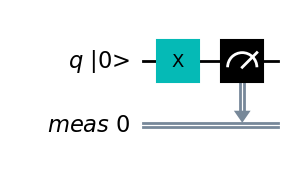

In [7]:
circuit.draw(**draw_kwargs)

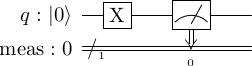

In [8]:
circuit.draw(output="latex", initial_state=True, plot_barriers=False)

Run the circuit and look at the results

In [9]:
result = execute(circuit, simulator, shots=1000).result()
counts = result.get_counts(circuit)
counts

{'1': 1000}

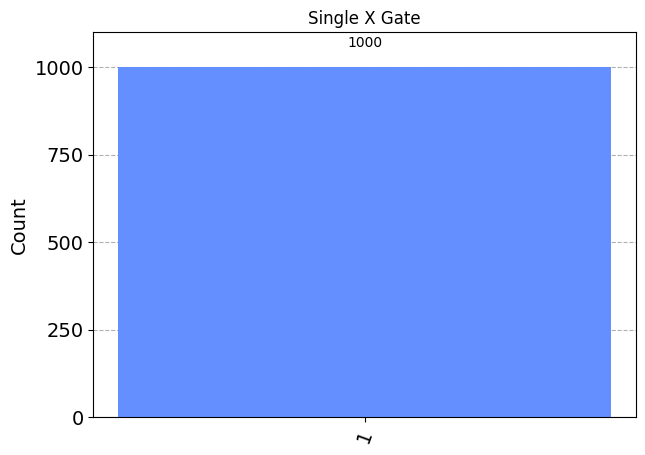

In [10]:
plot_histogram(counts, title="Single X Gate")

Insert a second X gate and repeat

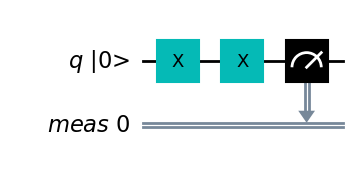

In [11]:
circuit = QuantumCircuit(1)
circuit.x(0)
circuit.x(0)
circuit.measure_all()
circuit.draw(**draw_kwargs)

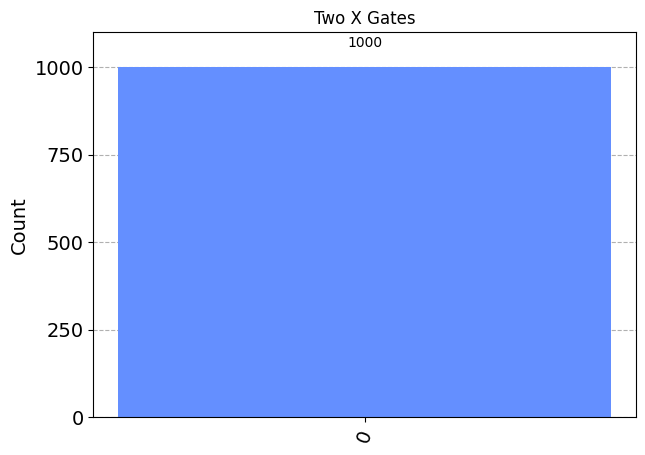

In [12]:
result = execute(circuit, simulator, shots=1000).result()
counts = result.get_counts(circuit)
plot_histogram(counts, title="Two X Gates")

### The H Hadamard Gate

We begin with a single Hadamard gate on |0⟩ 

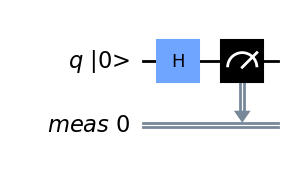

In [57]:
circuit = QuantumCircuit(1)
circuit.h(0)
circuit.measure_all()
circuit.draw(**draw_kwargs)

What result do we get?

In [58]:
result = execute(circuit, simulator, shots=1000).result()
counts = result.get_counts(circuit)
counts

{'0': 506, '1': 494}

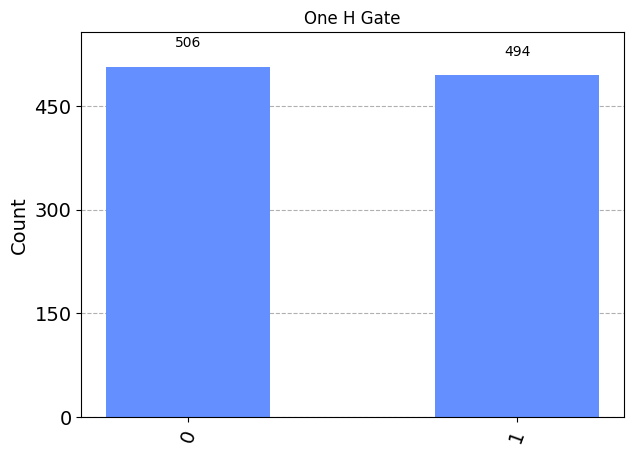

In [59]:
plot_histogram(counts, title="One H Gate")

What if we have two H gates?

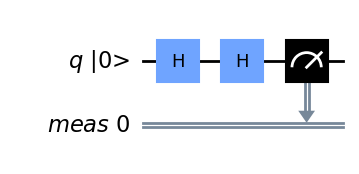

In [60]:
circuit = QuantumCircuit(1)
circuit.h(0)
circuit.h(0)
circuit.measure_all()
circuit.draw(**draw_kwargs)

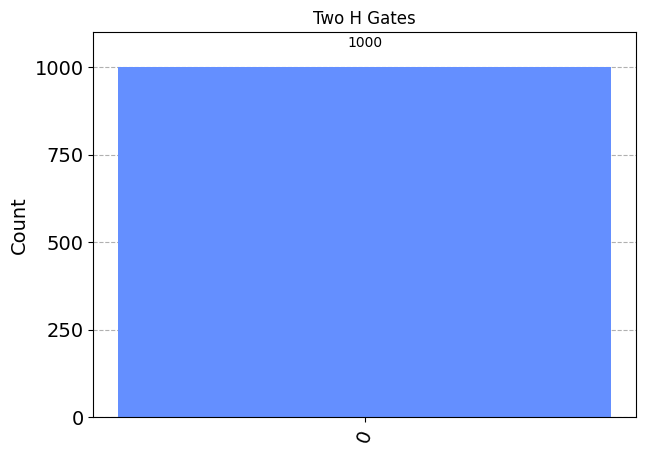

In [61]:
result = execute(circuit, simulator, shots=1000).result()
counts = result.get_counts(circuit)
plot_histogram(counts, title="Two H Gates")

What if we apply an H to |1⟩?

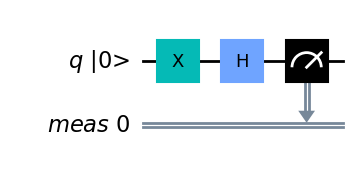

In [130]:
circuit = QuantumCircuit(1)
circuit.x(0)
circuit.h(0)
circuit.measure_all()
circuit.draw(**draw_kwargs)

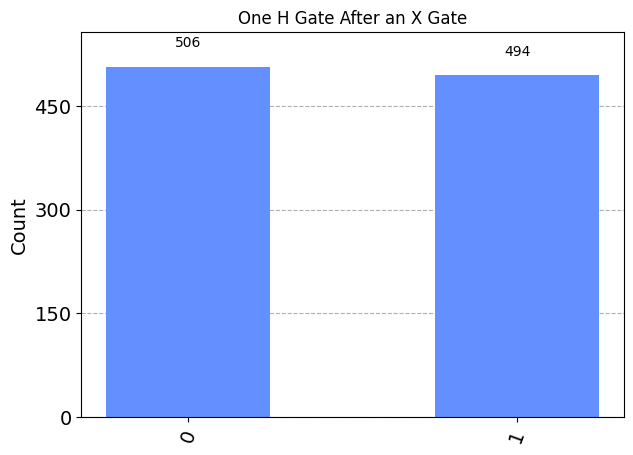

In [131]:
result = execute(circuit, simulator, shots=1000).result()
counts = result.get_counts(circuit)
plot_histogram(counts, title="One H Gate After an X Gate")

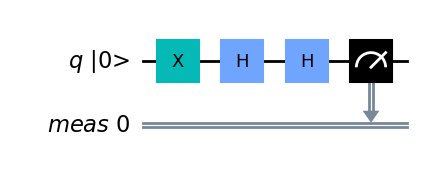

In [132]:
circuit = QuantumCircuit(1)
circuit.x(0)
circuit.h(0)
circuit.h(0)
circuit.measure_all()
circuit.draw(**draw_kwargs)

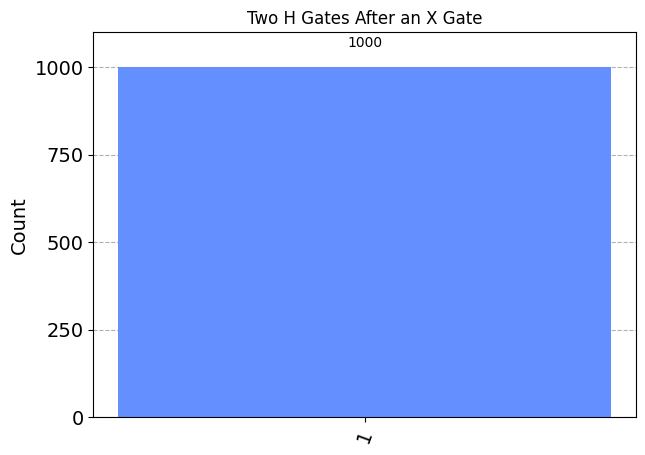

In [133]:
result = execute(circuit, simulator, shots=1000).result()
counts = result.get_counts(circuit)
plot_histogram(counts, title="Two H Gates After an X Gate")

### Parametrized Y Gate

![Alt text](image-1.png)

#### π/2

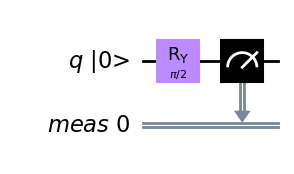

In [231]:
circuit = QuantumCircuit(1)
circuit.ry(pi/2, 0)
circuit.measure_all()
circuit.draw(**draw_kwargs)

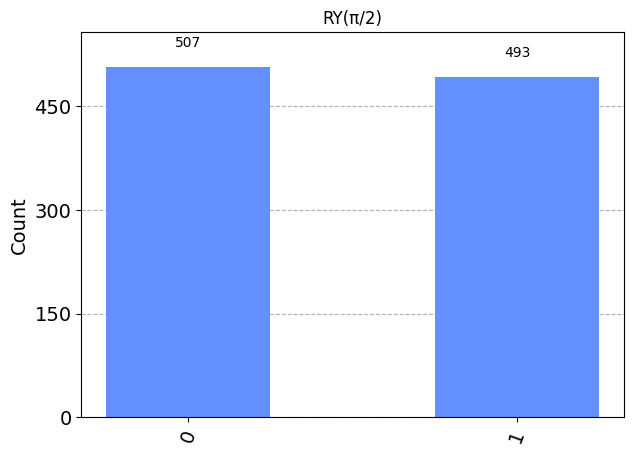

In [232]:
result = execute(circuit, simulator, shots=1000).result()
counts = result.get_counts(circuit)
plot_histogram(counts, title="RY(π/2)")

#### π

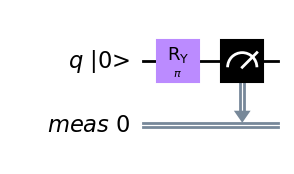

In [233]:
circuit = QuantumCircuit(1)
circuit.ry(pi, 0)
circuit.measure_all()
circuit.draw(**draw_kwargs)

In [234]:
result = execute(circuit, simulator, shots=1000).result()
counts = result.get_counts(circuit)
counts

{'1': 1000}

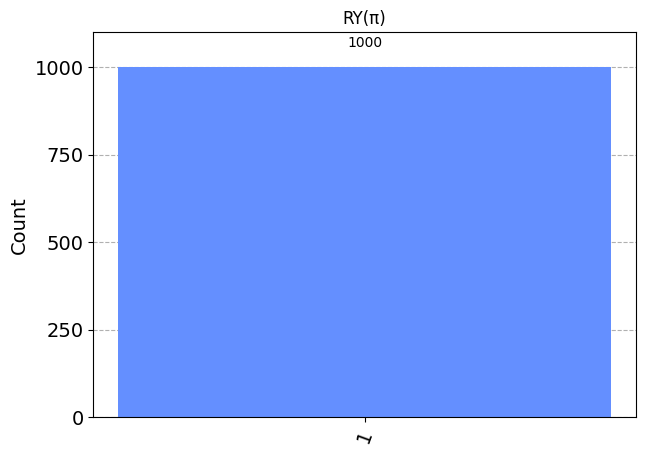

In [235]:
plot_histogram(counts, title="RY(π)")

#### 3π/4 - Explain what is happening here

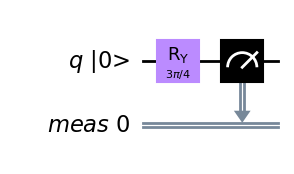

In [236]:
circuit = QuantumCircuit(1)
circuit.ry(3*pi/4, 0)
circuit.measure_all()
circuit.draw(**draw_kwargs)

In [237]:
result = execute(circuit, simulator, shots=1000).result()
counts = result.get_counts(circuit)
counts

{'1': 868, '0': 132}

In [238]:
[cos(3*pi/8)**2, sin(3*pi/8)**2]

[0.1464466094067263, 0.8535533905932737]

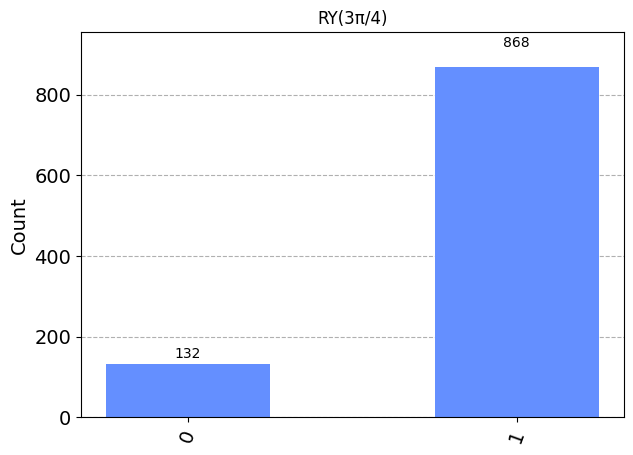

In [239]:
plot_histogram(counts, title="RY(3π/4)")

### The RESET Operation

The RESET operation irreversibly sets a qubit's state to |0⟩

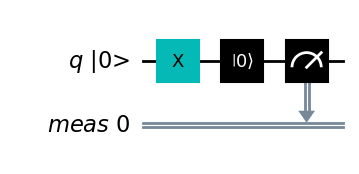

In [240]:
circuit = QuantumCircuit(1)
circuit.x(0)
circuit.reset(0)
circuit.measure_all()
circuit.draw(**draw_kwargs)

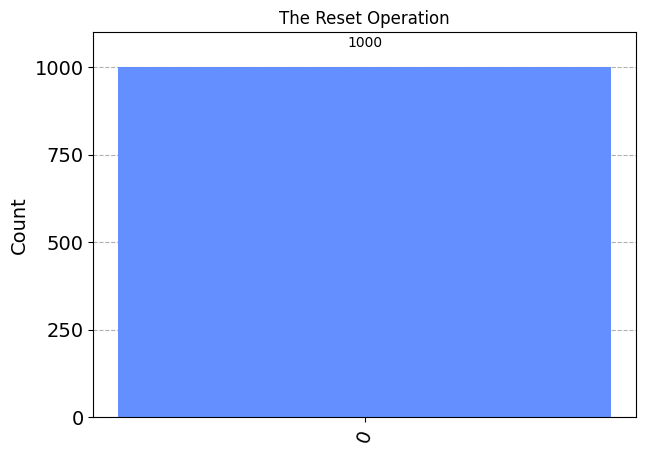

In [241]:
result = execute(circuit, simulator, shots=1000).result()
counts = result.get_counts(circuit)
plot_histogram(counts, title="The Reset Operation")

Let's show this again with two qubits.

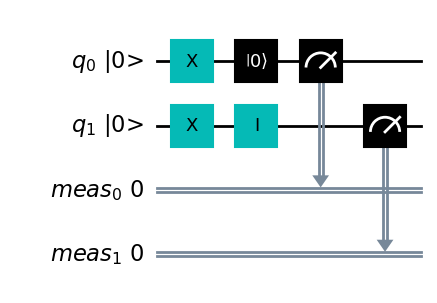

In [242]:
circuit = QuantumCircuit(2)
circuit.x(0)
circuit.reset(0)
circuit.x(1)
circuit.id(1)
circuit.measure_all()
circuit.draw(**draw_kwargs)

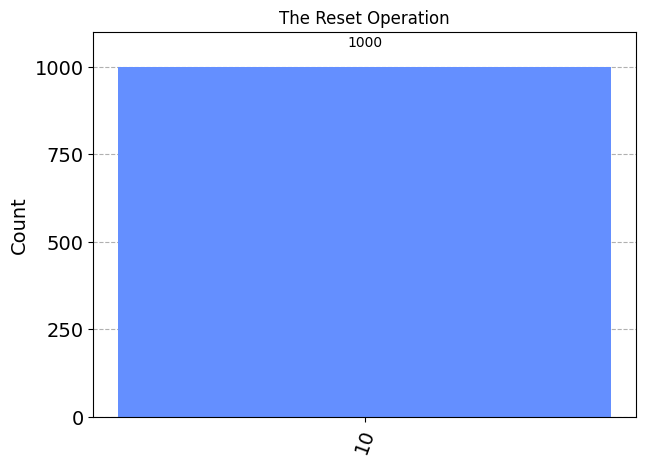

In [243]:
result = execute(circuit, simulator, shots=1000).result()
counts = result.get_counts(circuit)
plot_histogram(counts, title="The Reset Operation")

### A random 3-qubit circuit

How would you write a simulator in Python to simulate this behavior?

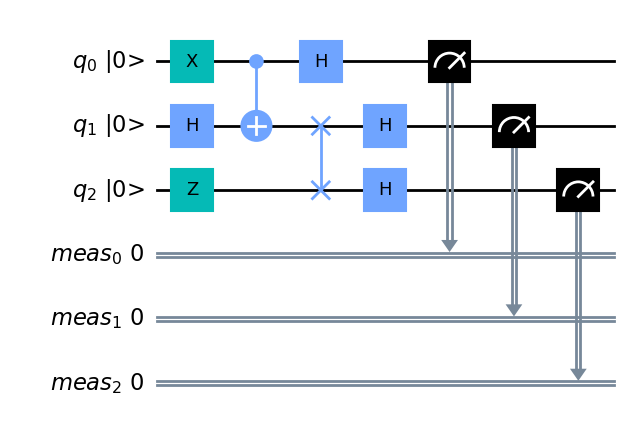

In [254]:
circuit = QuantumCircuit(3)
circuit.x(0)
circuit.h(1)
circuit.z(2)
circuit.cx(0,1)
circuit.swap(1,2)
circuit.h(0)
circuit.h(1)
circuit.h(2)
circuit.measure_all()
circuit.draw(**draw_kwargs)

In [255]:
result = execute(circuit, simulator, shots=1000).result()
counts = result.get_counts(circuit)
counts

{'010': 237, '000': 285, '011': 245, '001': 233}

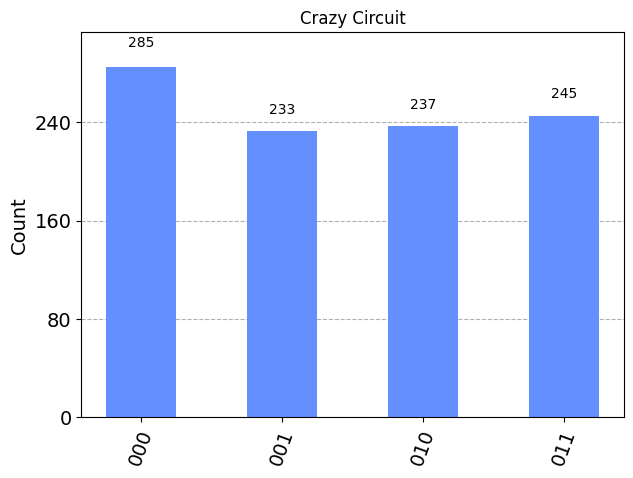

In [256]:
plot_histogram(counts, title="Crazy Circuit")